In [1]:
import scipy.io.wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft

In [2]:
# read ECG data from the WAV file
sampleRate, data = scipy.io.wavfile.read('human.wav')
data = data[:,0] - data[:, 1]
times = np.arange(len(data))/sampleRate
x = np.linspace(0, 5, 20000)

In [3]:
def MA(x, w = 10):
    return np.convolve(x, np.ones(w), 'valid') / w

In [46]:
def LPF(x, N = 2, Wn = 30/4000):
    b, a = scipy.signal.butter(N, Wn,btype="low")
    filtered = scipy.signal.filtfilt(b, a, x)
    return filtered

In [49]:
def draw_FFT(data, plt, name, id):
    N = 20000
    T = 1.0 / 4000.0
    y = data
    y_f = scipy.fft.fft(y)
    x_f = np.linspace(0.0, 1.0/(2.0*T), N//2)


    plt.subplot(id)
    plt.plot(x_f, 2.0/N * np.abs(y_f[:N//2]))
    plt.xlim(1, 1e3)
    plt.title(name)
    plt.xscale("log")
    plt.margins(0, .05)

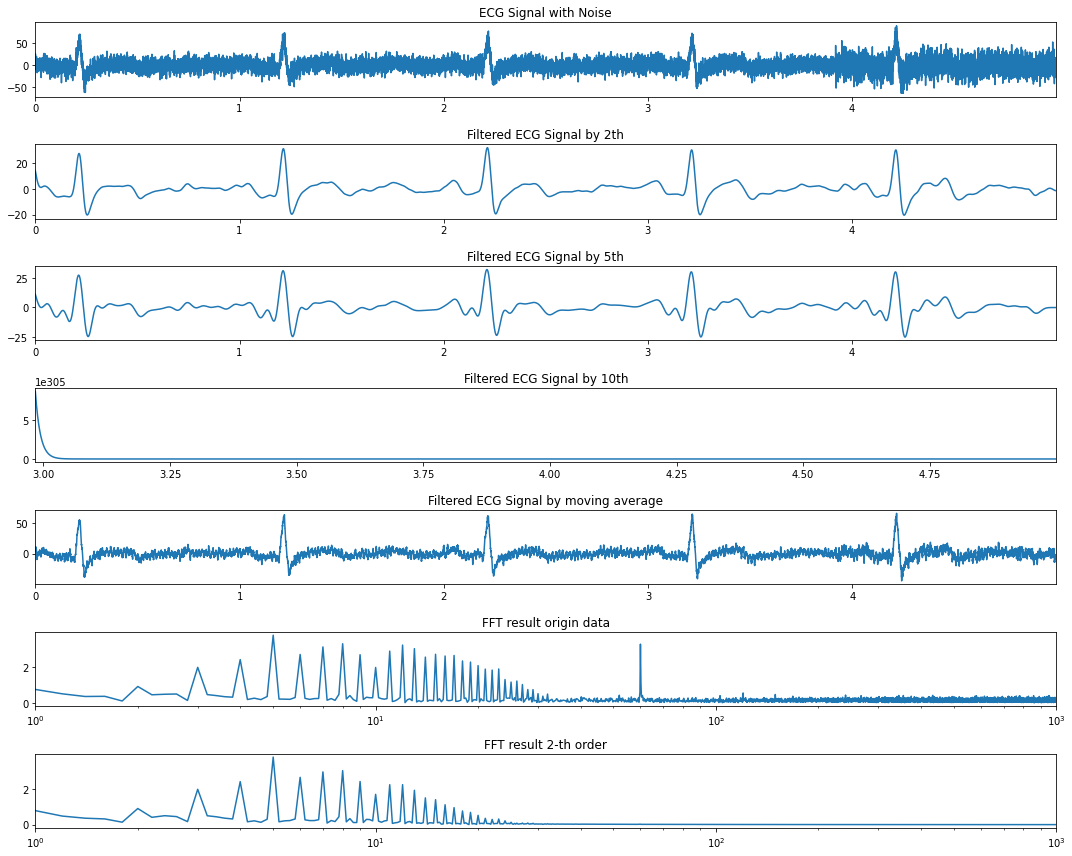

In [50]:
plt.figure(figsize=(15, 12))

plt.subplot(711)
plt.plot(times, data)
plt.title("ECG Signal with Noise")
plt.margins(0, .05)

plt.subplot(712)
plt.plot(times, LPF(data, N = 2))
plt.title("Filtered ECG Signal by 2th")
plt.margins(0, .05)

plt.subplot(713)
plt.plot(times, LPF(data, N = 8))
plt.title("Filtered ECG Signal by 5th")
plt.margins(0, .05)

plt.subplot(714)
plt.plot(times, LPF(data, N = 10))
plt.title("Filtered ECG Signal by 10th")
plt.margins(0, .05)

plt.subplot(715)
plt.plot(times[:-9], MA(data))
plt.title("Filtered ECG Signal by moving average")
plt.margins(0, .05)

draw_FFT(data, plt, name = "FFT result origin data", id = 716)
draw_FFT(LPF(data, N = 2), plt, name = "FFT result 2-th order", id = 717)

plt.tight_layout()
plt.show()
